### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-22,390660,3882237,602462,504717,231505,128272,127322,128180,110991,90553,80719,101302,83217,4846,190645
2021-06-23,391981,3891760,602837,507109,231847,128291,127352,128719,111024,90620,80748,101947,83329,4846,190906
2021-06-24,393310,3900372,603178,509141,232068,128312,127362,129278,111068,90685,80766,102636,83473,4846,191073
2021-06-25,394493,3909654,603744,511142,232346,128330,127418,129869,111101,90752,80779,103321,83588,4847,191447
2021-06-26,395751,3917118,603891,512735,232521,128353,127458,130479,111113,90761,80779,104014,83711,4846,191447


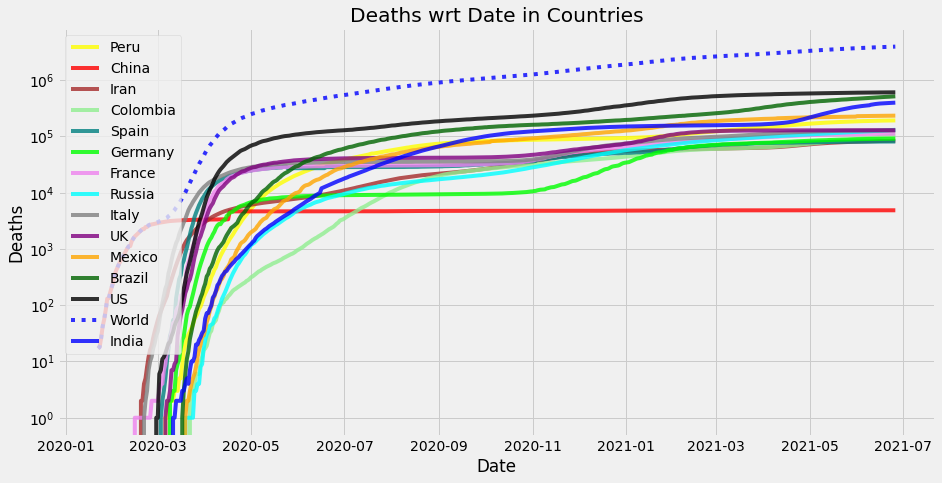

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-22,50848,372137,10940,87822,4233,11507,834,16438,2213,685,4040,28616,11716,31,0
2021-06-23,54069,437255,12436,115228,4963,15943,1140,17303,2330,1135,4341,29995,11059,18,2995
2021-06-24,51667,403837,12830,73602,5340,16705,266,19871,2151,475,4507,32997,11734,31,2843
2021-06-25,48698,421740,23715,79277,5270,15374,751,20065,1988,751,4924,32733,10820,29,6813
2021-06-26,50040,362819,7303,64134,5051,17946,838,21312,2128,488,0,33594,7034,16,0


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-22,110721,415836,15961,67193,2953,7104,2428,12656,3124,2991,4195,25178,10116,24,3648
2021-06-23,106945,417264,15726,70396,3087,7693,2342,12965,3071,2867,4205,25499,10179,24,3604
2021-06-24,103259,416369,15532,70609,3237,8294,2203,13426,3010,2708,4225,25999,10283,24,3554
2021-06-25,99622,416727,16078,71187,3372,8766,2106,13868,2942,2577,4271,26448,10319,24,3771
2021-06-26,96316,413133,15493,70717,3484,9378,2022,14365,2887,2438,3987,26924,10100,24,3519


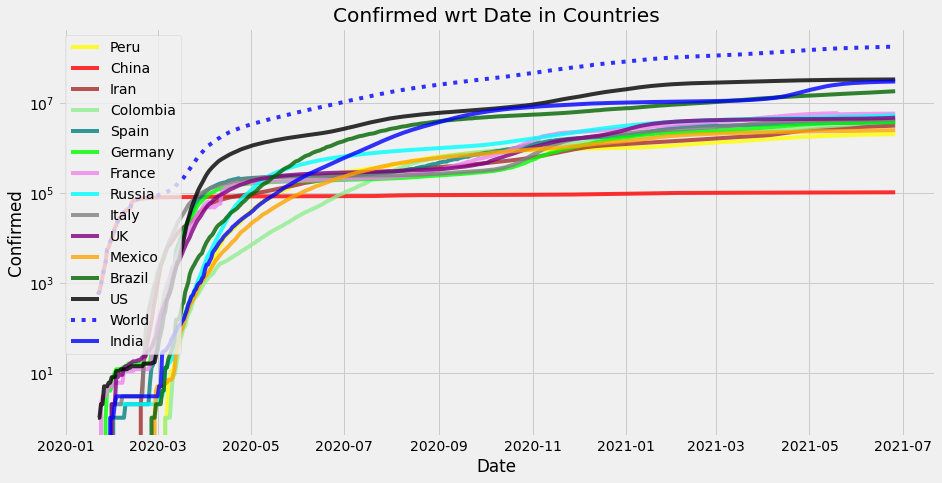

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-22,1358,8982,370,2131,261,27,31,539,51,76,30,720,116,0,0
2021-06-23,1321,9523,375,2392,342,19,30,539,33,67,29,645,112,0,261
2021-06-24,1329,8612,341,2032,221,21,10,559,44,65,18,689,144,0,167
2021-06-25,1183,9282,566,2001,278,18,56,591,33,67,13,685,115,1,374
2021-06-26,1258,7464,147,1593,175,23,40,610,12,9,0,693,123,-1,0


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-22,2221.04,9139.07,322.92,1854.72,197.18,11.63,45.15,423.05,52.37,77.76,27.56,599.68,134.42,0.00,261.22
2021-06-23,2108.53,9187.06,329.43,1921.88,215.28,12.55,43.25,437.54,49.95,76.42,27.74,605.34,131.62,0.00,261.19
2021-06-24,2011.09,9115.18,330.88,1935.65,216.00,13.61,39.10,452.73,49.21,74.99,26.52,615.80,133.16,0.00,249.42
2021-06-25,1907.58,9136.03,360.27,1943.82,223.75,14.16,41.21,470.01,47.18,73.99,24.83,624.45,130.89,0.13,264.99
2021-06-26,1826.38,8927.03,333.61,1899.96,217.66,15.26,41.06,487.51,42.78,65.87,21.73,633.02,129.91,-0.02,231.87


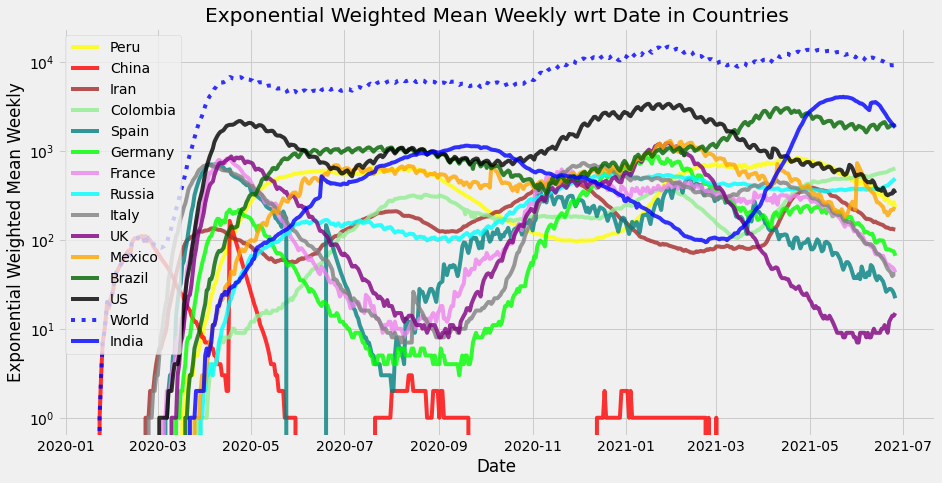

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

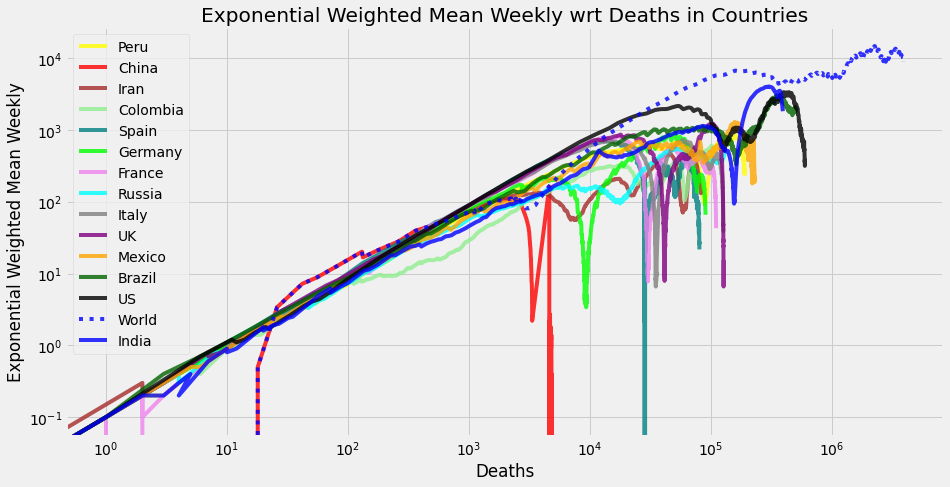

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

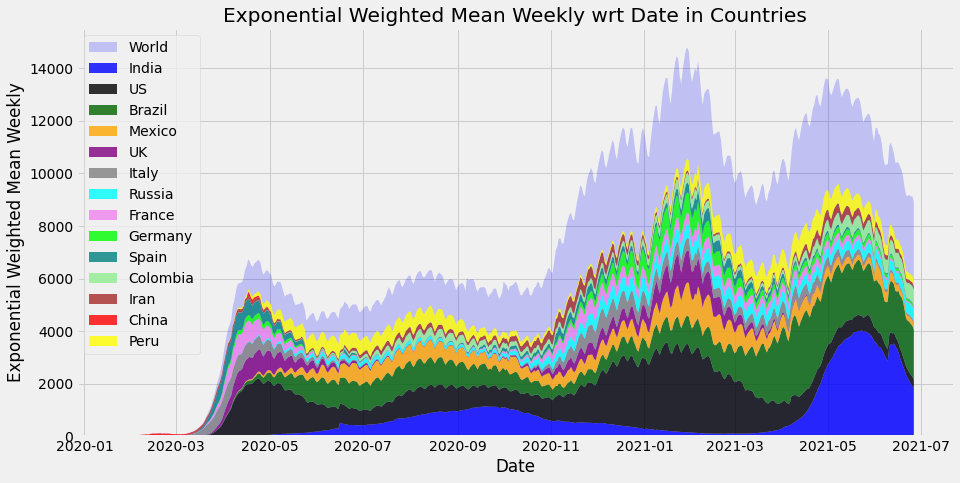

In [20]:
stackplotter(AVG, name)

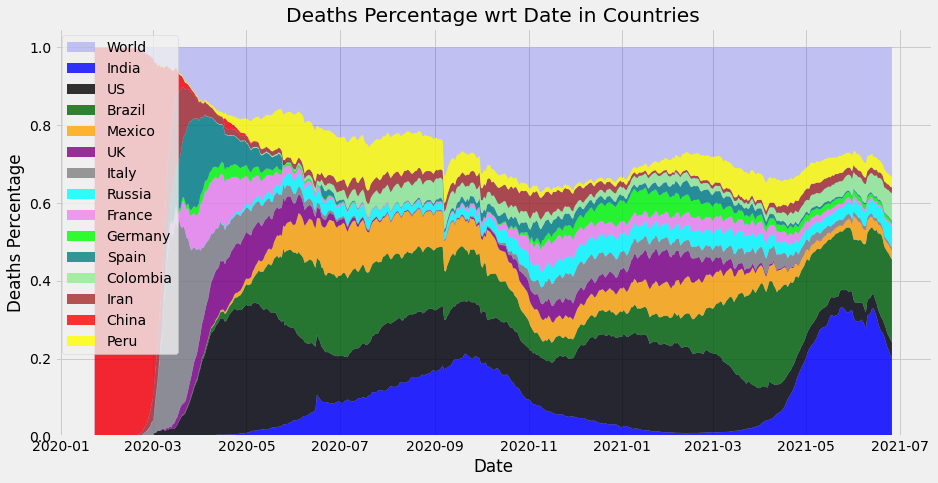

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

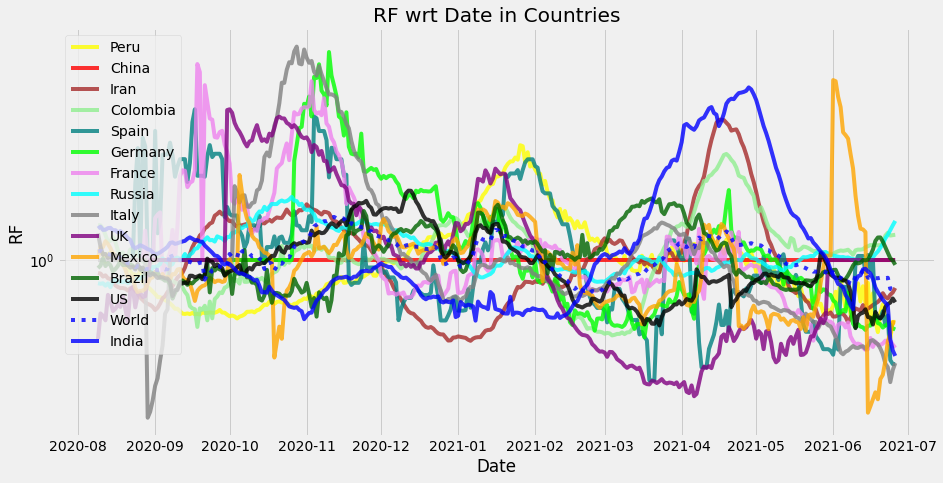

In [23]:
plotter(Reproductivity[200:], 'RF')

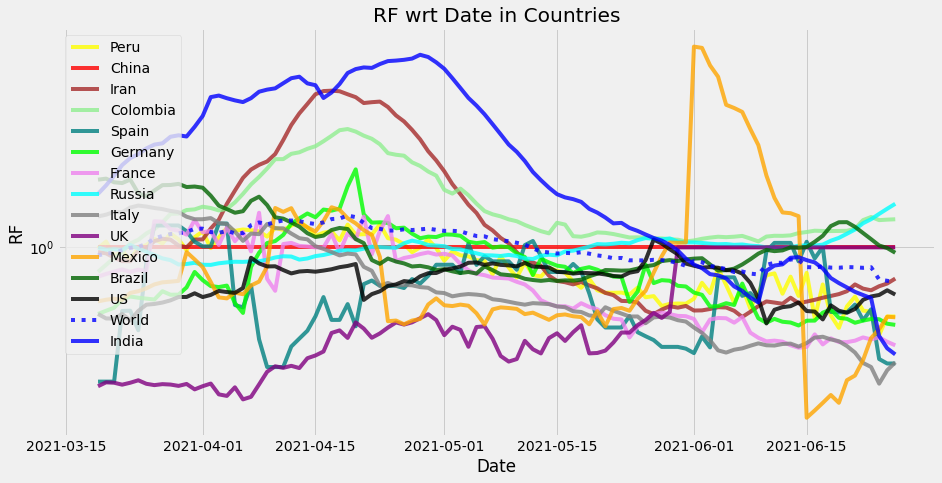

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

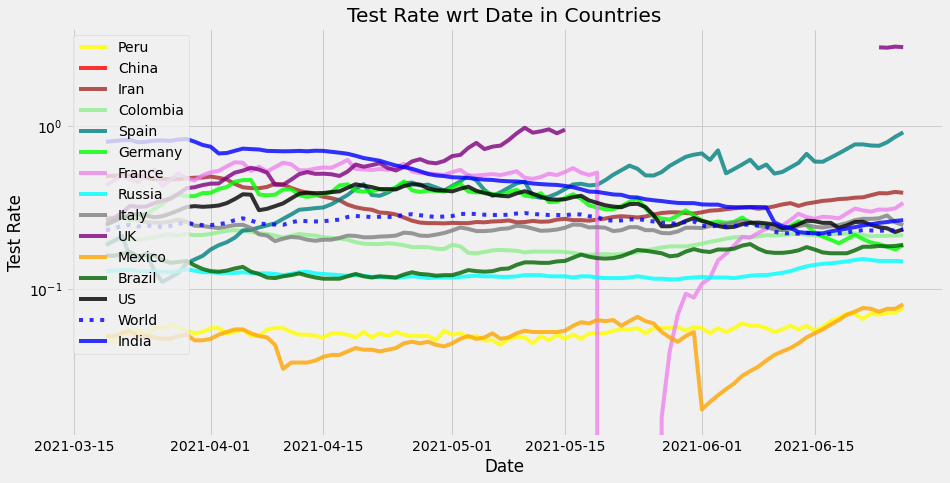

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

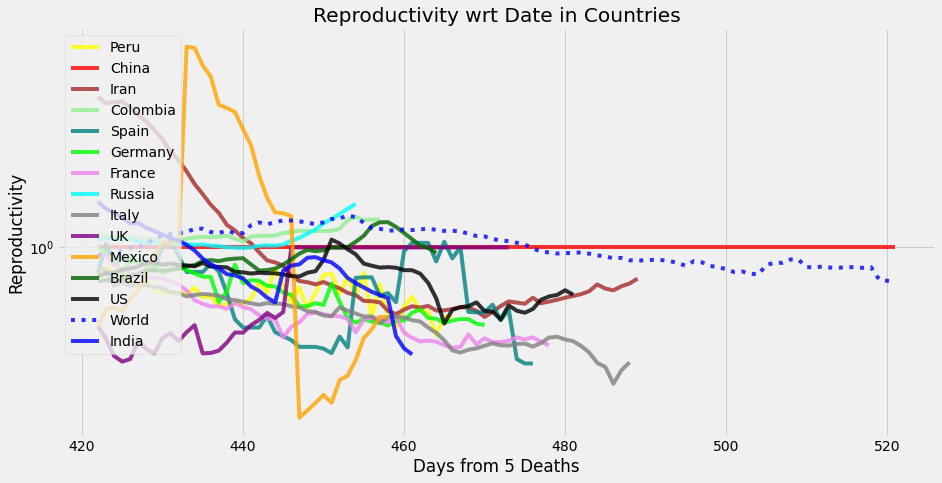

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

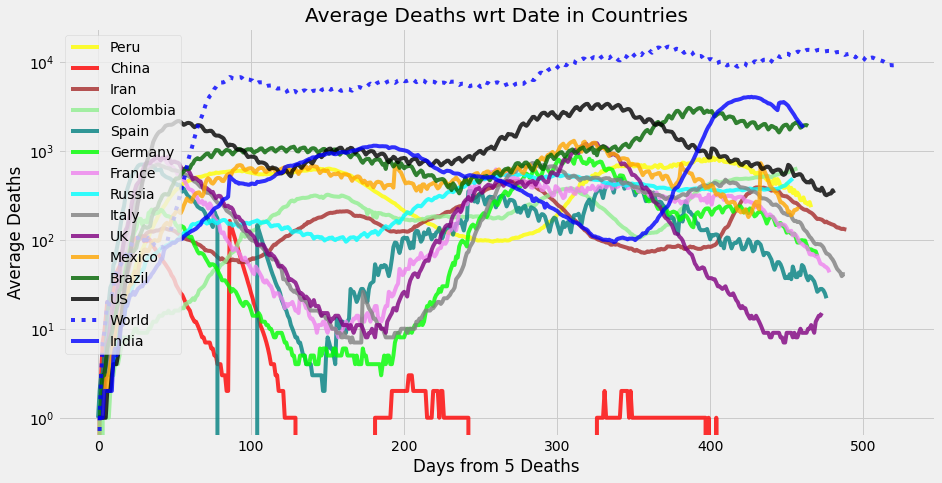

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

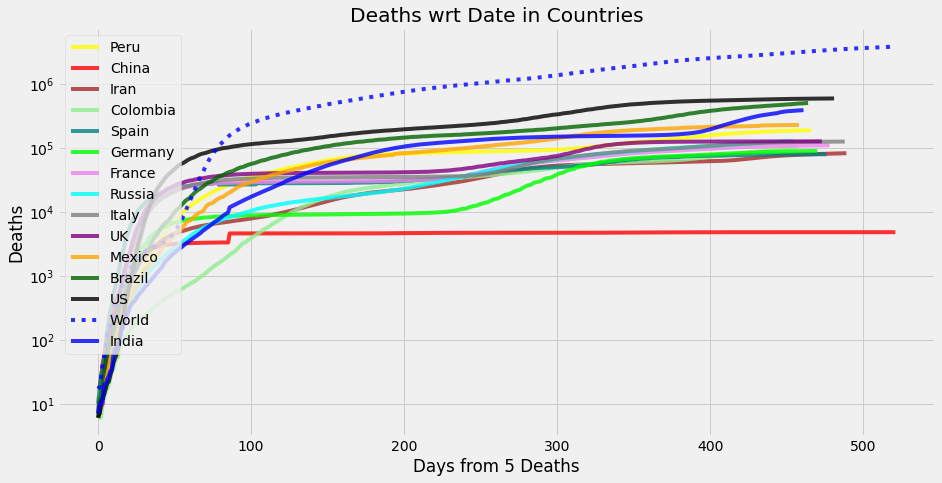

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3917118,7464,8213.57,8927.03,0.8125,180783947,0.231,413133,783.42
US,603891,147,307.14,333.61,0.7535,33621499,0.232,15493,120.78
Brazil,512735,1593,1705.00,1899.96,0.9684,18386894,0.186,70717,102.55
India,395751,1258,1291.86,1826.38,0.5262,30233183,0.264,96316,79.15
Mexico,232521,175,223.14,217.66,0.6575,2503408,0.080,3484,46.50
Peru,191447,0,216.29,231.87,0.6607,2043262,0.076,3519,38.29
Russia,130479,610,531.14,487.51,1.2993,5367317,0.147,14365,26.10
UK,128353,23,17.00,15.26,1.0000,4734011,3.073,9378,25.67
Italy,127458,40,29.29,41.06,0.5016,4257289,0.246,2022,25.49


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3917118,7464,8213.57,8927.03,0.8125,180783947,0.231,413133,783.42
Brazil,512735,1593,1705.00,1899.96,0.9684,18386894,0.186,70717,102.55
India,395751,1258,1291.86,1826.38,0.5262,30233183,0.264,96316,79.15
Colombia,104014,693,668.43,633.02,1.1840,4126340,0.213,26924,20.80
Russia,130479,610,531.14,487.51,1.2993,5367317,0.147,14365,26.10
Argentina,92317,338,510.71,519.79,0.9163,4393142,0.220,22848,18.46
Indonesia,56729,358,348.29,297.21,1.6793,2093962,0.194,11512,11.35
US,603891,147,307.14,333.61,0.7535,33621499,0.232,15493,120.78
Mexico,232521,175,223.14,217.66,0.6575,2503408,0.080,3484,46.50


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  3917118


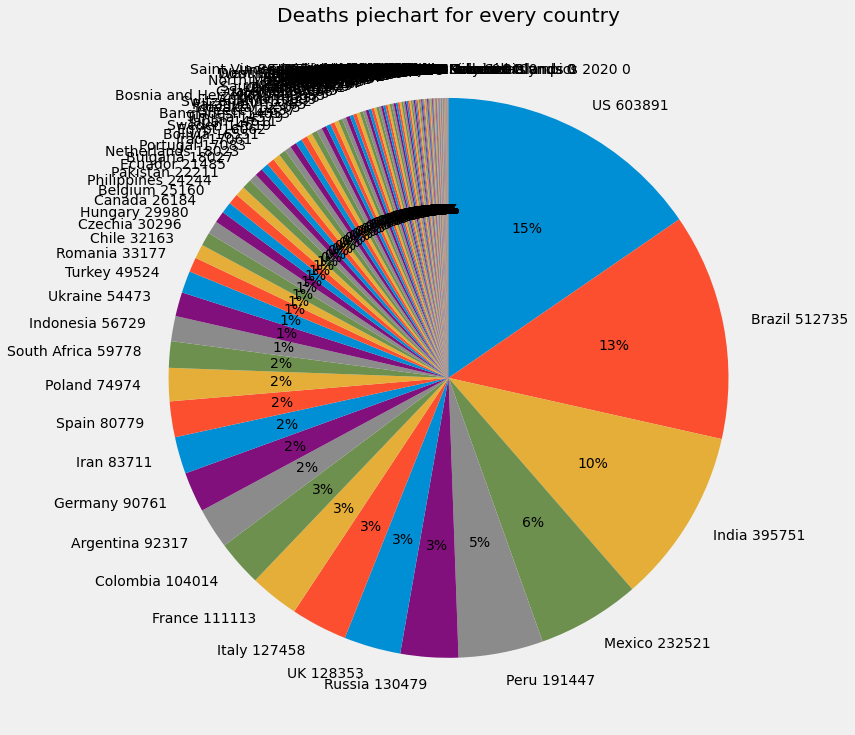

In [35]:
piechart('Deaths')

World total:  8213


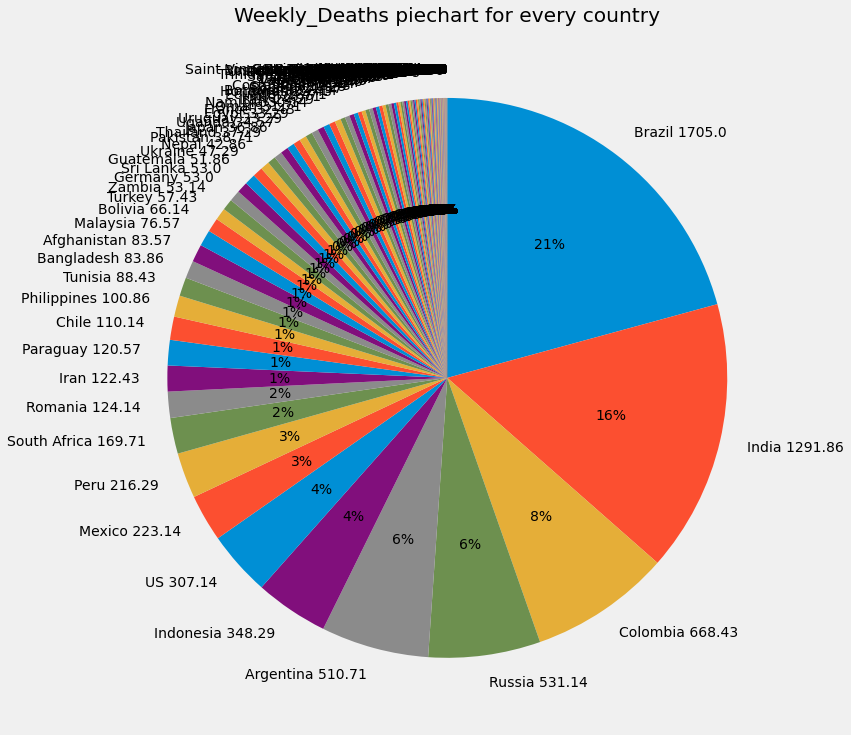

In [36]:
piechart('Weekly_Deaths')

World total:  7464


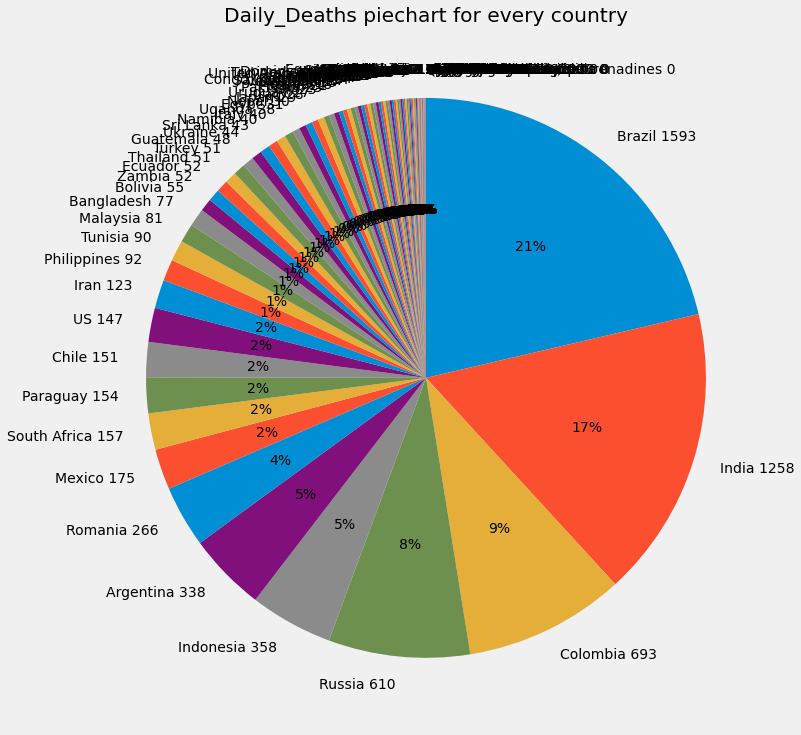

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-06-27


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

783423600.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 8ae3aeb] `date` update
 1 file changed, 2124 insertions(+), 2125 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (68%)


To https://github.com/Arrowheadahp/COVID-19.git
   dcc2509..8ae3aeb  master -> master
